# Задание 1.1

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats
import pandas as pd

plt.style.use("ggplot")

Для генерации выборки используем библиотечную функцию:

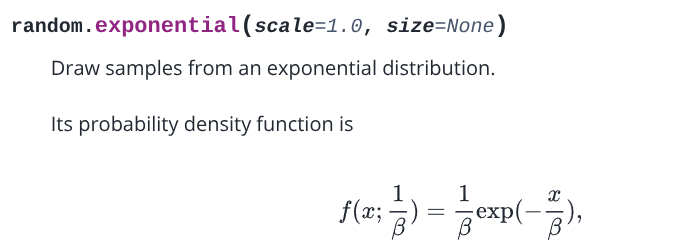


In [9]:
# Задаем выборку

n = 25
scale = 1.0
sample = np.random.exponential(scale=scale, size=n)

sample

array([0.50128167, 0.36031389, 0.17721824, 0.82263116, 0.82070455,
       0.38179294, 0.0934043 , 0.62866437, 0.34179649, 2.28518089,
       0.20352457, 0.04415073, 3.25257704, 0.52357548, 0.18502911,
       0.48080893, 0.126451  , 0.25349312, 0.98927754, 0.10848728,
       0.82991147, 0.53943691, 0.24031172, 0.57029896, 0.46076453])

In [ ]:
# Для непрерывных данных мода оценивается через интервалы
hist, bins = np.histogram(sample, bins='auto')
mode_bin_index = np.argmax(hist)
mode_estimate = (bins[mode_bin_index] + bins[mode_bin_index + 1]) / 2

median = sorted(sample)[n // 2] if (n % 2 == 1) else (sorted(sample)[n // 2 - 1] + sorted(sample)[n // 2]) / 2

sample_range = max(sample) - min(sample)


def asymmetry_coefficient(data):
    μ3 = np.average((data - np.average(data))** 3)
    σ = np.sqrt(np.var(data))
    return μ3 / σ**3


sample_asymmetry = asymmetry_coefficient(sample)

print(f"Мода = {mode_estimate}")
print(f"Медиана = {median}")
print(f"Размах выборки = {sample_range}")
print(f"Коэффициент асимметрии = {sample_asymmetry}")


Мода = 0.2045720500498342
Медиана = 0.4607645274520236
Размах выборки = 3.2084263021095207
Коэффициент асимметрии = 2.624732143865808


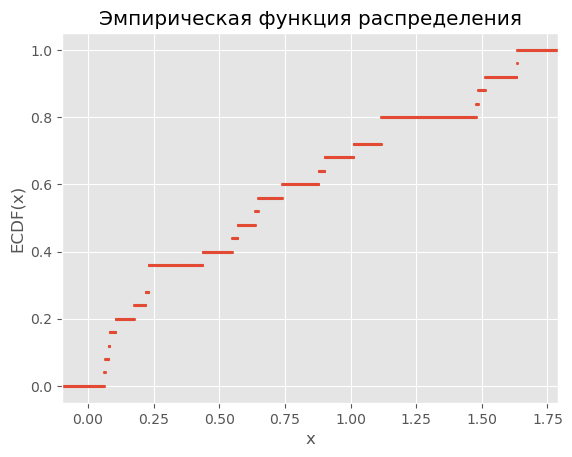

In [70]:
ecdf = ECDF(sample)

x_min = sample.min() - 0.1 * (sample.max() - sample.min())
x_max = sample.max() + 0.1 * (sample.max() - sample.min())

x_values = np.linspace(x_min, x_max, 1000)
y_values = ecdf(x_values)  

plt.scatter(x_values, y_values, s=3)
plt.xlabel('x')
plt.ylabel('ECDF(x)')
plt.title('Эмпирическая функция распределения')
plt.grid(True)
plt.xlim(x_min, x_max)
plt.show()

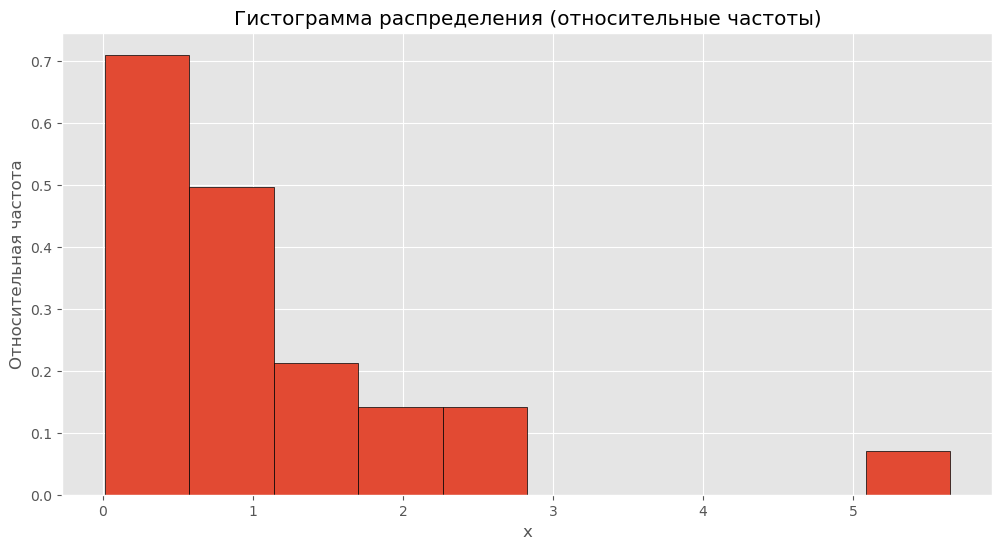

In [122]:
plt.figure(figsize=(12, 6))
plt.hist(sample, edgecolor='black', density=True)

plt.xlabel('x')
plt.ylabel('Относительная частота')
plt.title('Гистограмма распределения (относительные частоты)')
plt.grid(True)

plt.show()

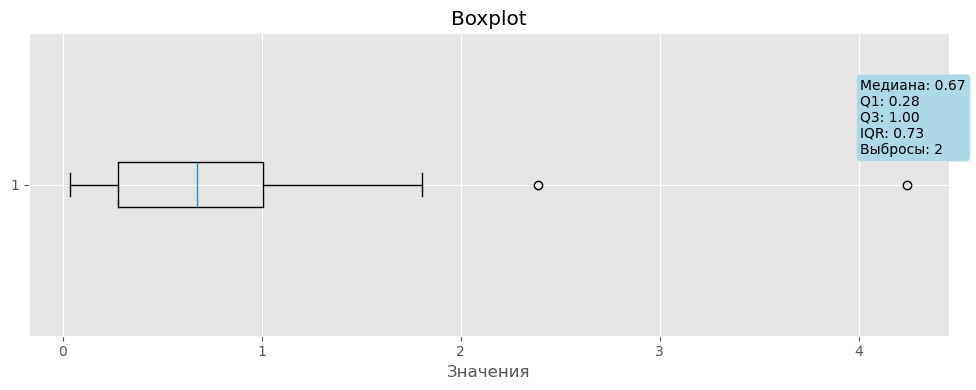

In [115]:
plt.figure(figsize=(10, 4))
plt.boxplot(sample, vert=False) 
plt.xlabel('Значения')
plt.title('Boxplot')


# Вычисление статистик
q1 = np.percentile(sample, 25)
q2 = np.median(sample)
q3 = np.percentile(sample, 75)
iqr = q3 - q1
lower_whisker = max(sample.min(), q1 - 1.5 * iqr)
upper_whisker = min(sample.max(), q3 + 1.5 * iqr)
outliers = sample[(sample < lower_whisker) | (sample > upper_whisker)]

# Добавление текста со статистикой
stats_text = f'Медиана: {q2:.2f}\n'
stats_text += f'Q1: {q1:.2f}\n'
stats_text += f'Q3: {q3:.2f}\n'
stats_text += f'IQR: {iqr:.2f}\n'
stats_text += f'Выбросы: {len(outliers)}'


plt.text(plt.xlim()[1]*0.9, 1.1, stats_text, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))



plt.tight_layout()
plt.show()

## Сравнить оценку плотности распределения среднего арифметического 

### С помощью ЦПТ

In [40]:
# Для экспоненциального распределения теоретические параметры:
# E[X] = scale, Var[X] = scale^2
# (Учитываем, что \frac{1}{\beta} \exp\left(-\frac{x}{\beta}\right))
theoretical_mean = scale
theoretical_se = scale / np.sqrt(n)


### BOOTSTRAP

In [ ]:
N = 10000  # подвыборок объема n с повторением элементов

bootstrap_means = np.zeros(shape=N)
for i in range(N):
    bootstrap_sample = np.random.choice(sample, size=n)
    bootstrap_means[i] = np.mean(bootstrap_sample)


bootstrap_mean = np.mean(bootstrap_means)
bootstrap_std = np.std(bootstrap_means)
bootstrap_ci = np.percentile(bootstrap_means, [2.5, 97.5])  # 95% доверительный интервал

### Сравнение ЦПТ и BOOTSTRAP

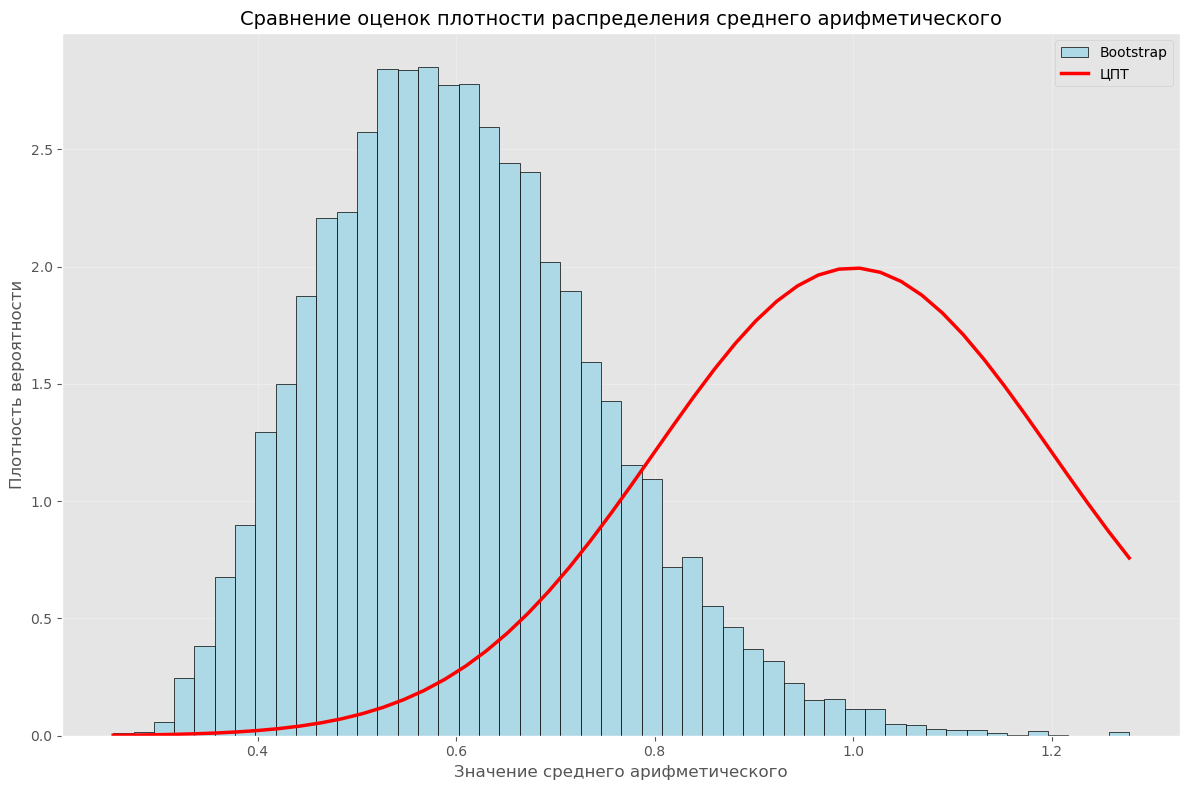

Сравнение оценок плотности распределения среднего (в численныъ значениях):
  Параметр       ЦПТ  Bootstrap
0        μ  1.000000   0.608034
1        σ  0.200000   0.139851
2       q1  0.865102   0.507768
3       q2  1.000000   0.596533
4       q3  1.134898   0.695711


In [42]:
plt.figure(figsize=(12, 8))

plt.hist(bootstrap_means, bins=50, density=True, 
         color='lightblue', edgecolor='black', 
         label='Bootstrap')

x = np.linspace(bootstrap_means.min(), bootstrap_means.max())
y = stats.norm.pdf(x, theoretical_mean, theoretical_se)
plt.plot(x, y, 'r-', linewidth=2.5, 
         label='ЦПТ')


# Оформление графика
plt.xlabel('Значение среднего арифметического', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.title('Сравнение оценок плотности распределения среднего арифметического', fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


comparison_df = pd.DataFrame({
    'Параметр': ['μ', 'σ', 'q1', 'q2', 'q3'],
    'ЦПТ': [
        theoretical_mean,
        theoretical_se,
        stats.norm.ppf(0.25, theoretical_mean, theoretical_se),
        stats.norm.ppf(0.5, theoretical_mean, theoretical_se),
        stats.norm.ppf(0.75, theoretical_mean, theoretical_se),
    ],
    'Bootstrap': [
        bootstrap_mean, 
        bootstrap_std,
        np.percentile(bootstrap_means, 25),
        np.percentile(bootstrap_means, 50),
        np.percentile(bootstrap_means, 75),
    ]
})

print("Сравнение оценок плотности распределения среднего (в численныъ значениях):")
print(comparison_df)


## Bootstrap оценка плотности распределения коэффициента асимметрии 

Параметры оценки: 
μ = 2.1858867881773443
σ = 0.8758301000935138
Вероятность того, что <1: 0.1218


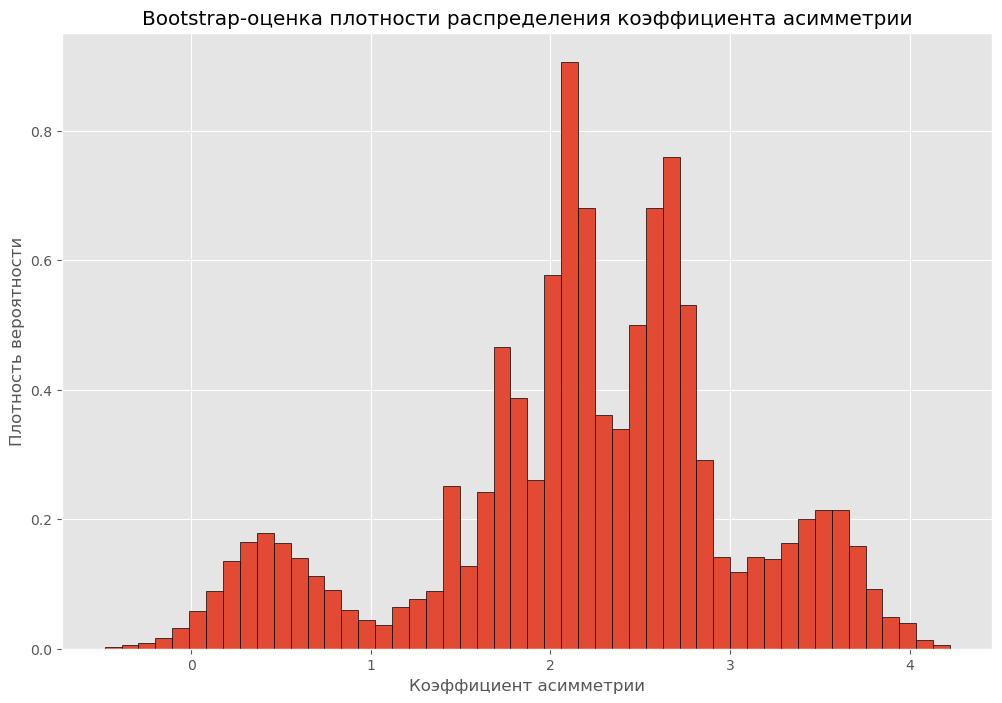

In [ ]:
bootstrap_asymmetries = np.zeros(shape=N)

for i in range(N):
    bootstrap_sample = np.random.choice(sample, size=n)
    bootstrap_asymmetries[i] = asymmetry_coefficient(bootstrap_sample)

print("Параметры оценки: ")
print(f"μ = {np.average(bootstrap_asymmetries)}")
print(f"σ = {np.std(bootstrap_asymmetries)}")
print(f"Вероятность того, что <1: {np.mean(bootstrap_asymmetries < 1)}")

plt.figure(figsize=(12, 8))
plt.hist(bootstrap_asymmetries, bins=50, density=True, edgecolor='black')
plt.xlabel('Коэффициент асимметрии')
plt.ylabel('Плотность вероятности')
plt.title('Bootstrap-оценка плотности распределения коэффициента асимметрии')
plt.show()